In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df=pd.read_csv(r"C:\Users\jnrgs\OneDrive\Documents\Notes\Sem 4\Data Analytics\project\car_prices.csv")
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [6]:
# Detect missing values (NaN)
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Detect rows with missing values
rows_with_nan = df[df.isnull().any(axis=1)]
print("Rows with missing values:\n", rows_with_nan)


Missing values in each column:
 year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64
Rows with missing values:
         year       make    model       trim         body transmission  \
14      2014  Chevrolet    Cruze        2LT        Sedan    automatic   
16      2015    Hyundai   Sonata         SE        Sedan    automatic   
22      2014  Chevrolet   Camaro         LT  Convertible    automatic   
25      2015    Hyundai   Sonata         SE        Sedan    automatic   
28      2014        BMW       X5  sDrive35i          SUV    automatic   
...      ...        ...      ...        ...          ...          ...   
558814  2014      Dodge  Charger         SE        Sedan         

In [7]:
#deleting entries with missing values & filling entries with the mean

df['odometer'] = df['odometer'].fillna(df['odometer'].mean())
df['mmr'] = df['mmr'].fillna(df['mmr'].mean())
df['sellingprice'] = df['sellingprice'].fillna(df['sellingprice'].mean())
df['condition'] = df['condition'].fillna(df['condition'].mean())
df['make'] = df['make'].fillna("unknown")
df['model'] = df['model'].fillna("unknown")
df['trim'] = df['trim'].fillna("unknown")
df['body'] = df['body'].fillna("unknown")
df['transmission'] = df['transmission'].fillna("unknown")
df['color'] = df['color'].fillna("unknown")
df['interior'] = df['interior'].fillna("unknown")
df['saledate'] = df['saledate'].fillna("unknown")



df = df.dropna(subset=['vin'])

print(df.isnull().sum())

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64


In [8]:
#Checking for duplicate values
duplicate_rows = df[df.duplicated()]
print("Duplicate rows:\n", duplicate_rows)


Duplicate rows:
 Empty DataFrame
Columns: [year, make, model, trim, body, transmission, vin, state, condition, odometer, color, interior, seller, mmr, sellingprice, saledate]
Index: []


In [9]:
#Detecting the presence of Outliers
from scipy import stats


# Calculate the z-scores for each feature in the DataFrame
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Find rows where the z-score is above a threshold (commonly 3)
outliers = (z_scores > 3).any(axis=1)
print("Outliers detected:\n", df[outliers])

Outliers detected:
         year           make                model                   trim  \
4       2014            BMW  6 Series Gran Coupe                   650i   
6       2014            BMW                   M5                   Base   
10      2014           Audi                   A6  3.0T Prestige quattro   
19      2014            BMW             6 Series                   650i   
24      2014            BMW             6 Series                   650i   
...      ...            ...                  ...                    ...   
558777  2012       Maserati         Quattroporte                      S   
558791  2012           Ford      Transit Connect              Wagon XLT   
558807  2014  Mercedes-Benz              E-Class         E63 AMG 4MATIC   
558816  2013  Mercedes-Benz              G-Class                G63 AMG   
558824  2013           Audi                   S5   Premium Plus quattro   

               body transmission                vin state  condition  \
4      

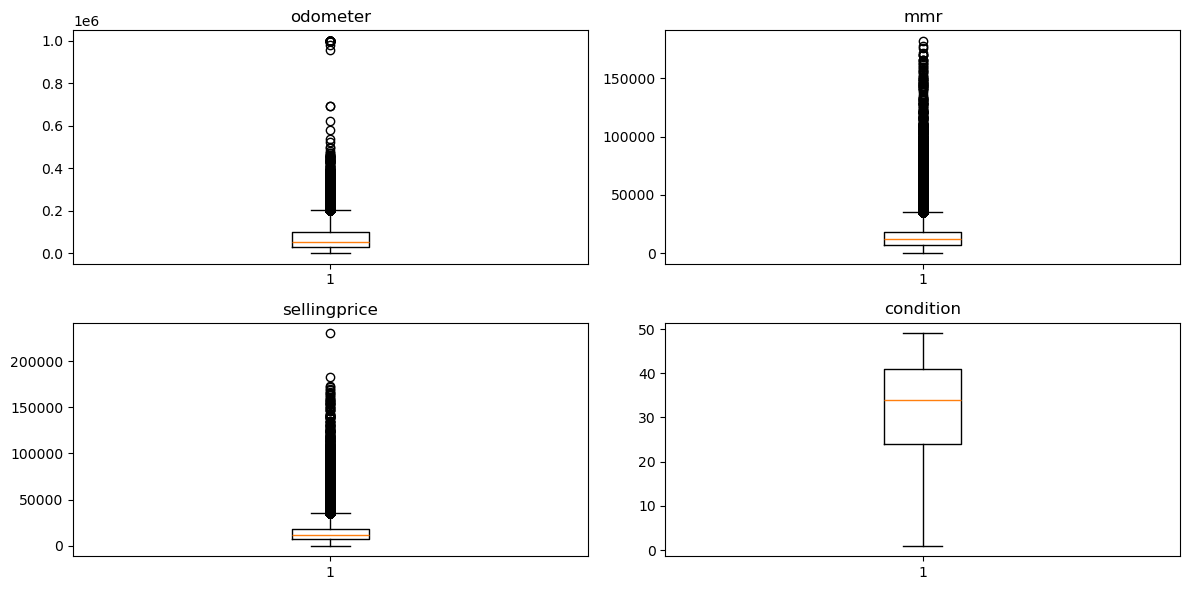

In [10]:
#Visualisation of Outliers
import matplotlib.pyplot as plt

# Create box plots for the numeric columns
plt.figure(figsize=(12, 6))
for i, column in enumerate(['odometer', 'mmr', 'sellingprice', 'condition'], 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


In [11]:
# Define a function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'odometer', 'mmr', and 'condition'
for column in ['odometer', 'mmr', 'condition']:
    df = remove_outliers(df, column)

# Check the shape of the DataFrame after removing outliers
print("DataFrame shape after removing outliers:", df.shape)


DataFrame shape after removing outliers: (531738, 16)


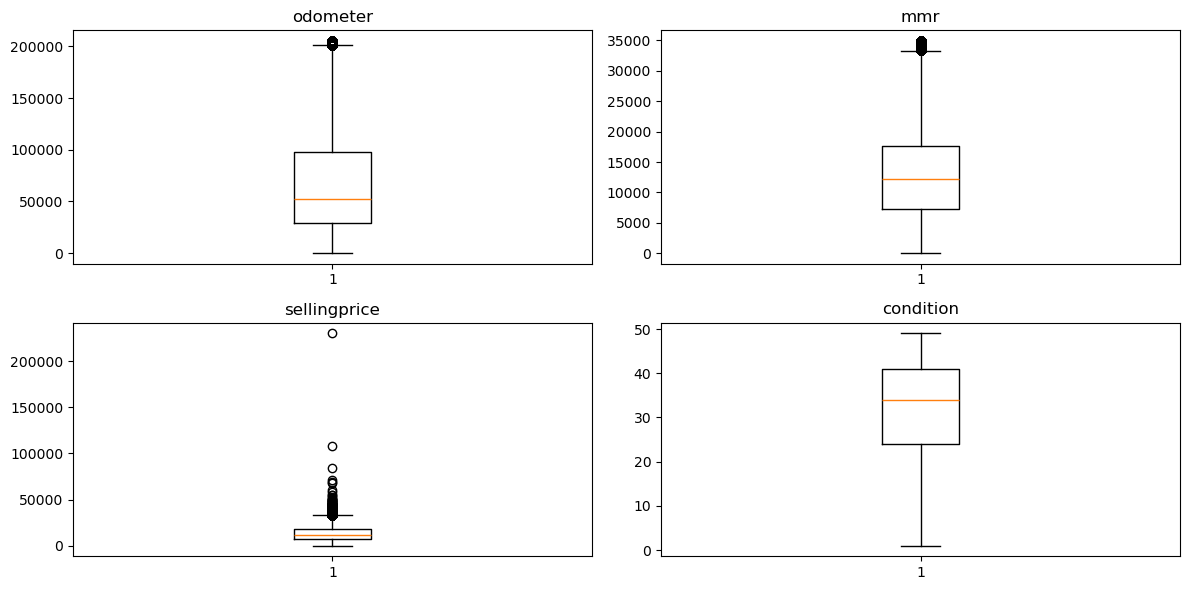

In [12]:
#Visualisation with Outliers Removed
import matplotlib.pyplot as plt

# Create box plots for the numeric columns
plt.figure(figsize=(12, 6))
for i, column in enumerate(['odometer', 'mmr', 'sellingprice', 'condition'], 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


In [13]:
#Checking for Nan values
nan_values = df.isna().sum()
print("NaN values in each column:\n", nan_values)


NaN values in each column:
 year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64


In [14]:
# Normalize all values to lowercase
df['model'] = df['model'].str.lower()

In [15]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,s60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
5,2015,Nissan,altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,x5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


Create clean csv and excel(data loss warning)

In [ ]:
df.to_csv(r"C:\Users\jnrgs\OneDrive\Documents\Notes\Sem 4\Data Analytics\project\cleaned_car_prices.csv")

In [ ]:
df.to_excel(r"C:\Users\jnrgs\OneDrive\Documents\Notes\Sem 4\Data Analytics\project\cleaned_car_prices.xlsx")

`Top 10 Sellers`

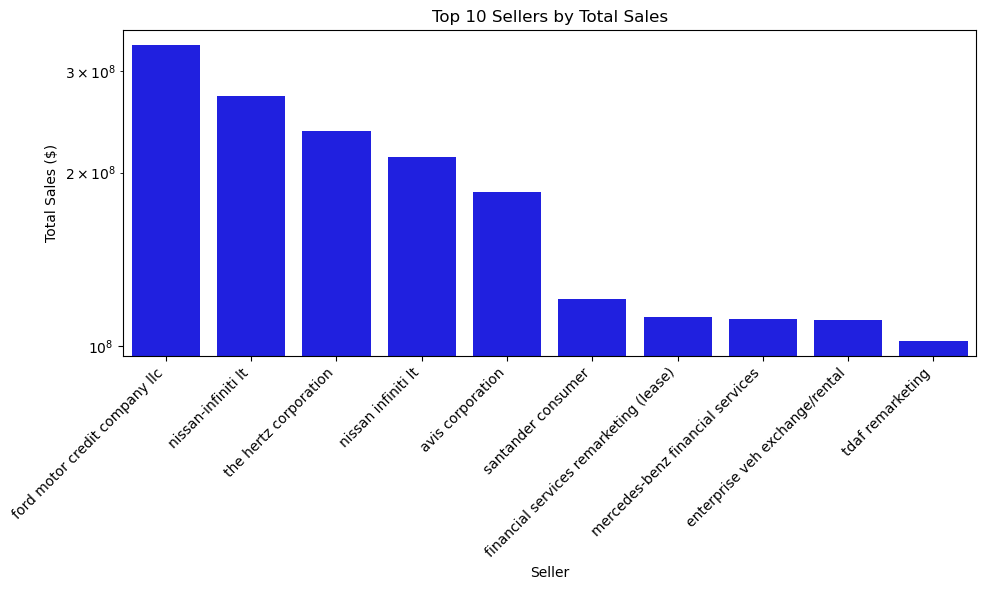

In [17]:
# Load the data
clean_df = df

# Group by seller and sum the sellingprice
top_sellers = clean_df.groupby('seller')['sellingprice'].sum().sort_values(ascending=False)

# Select the top 10 sellers
top_10_sellers = top_sellers.head(10)

# Plot the data for top 10 sellers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_sellers.index, y=top_10_sellers.values, color="blue")
plt.title('Top 10 Sellers by Total Sales')
plt.xlabel('Seller')
plt.ylabel('Total Sales ($)')

# Apply the log scale to the y-axis
plt.yscale('log')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

`Product Sales Distribution`

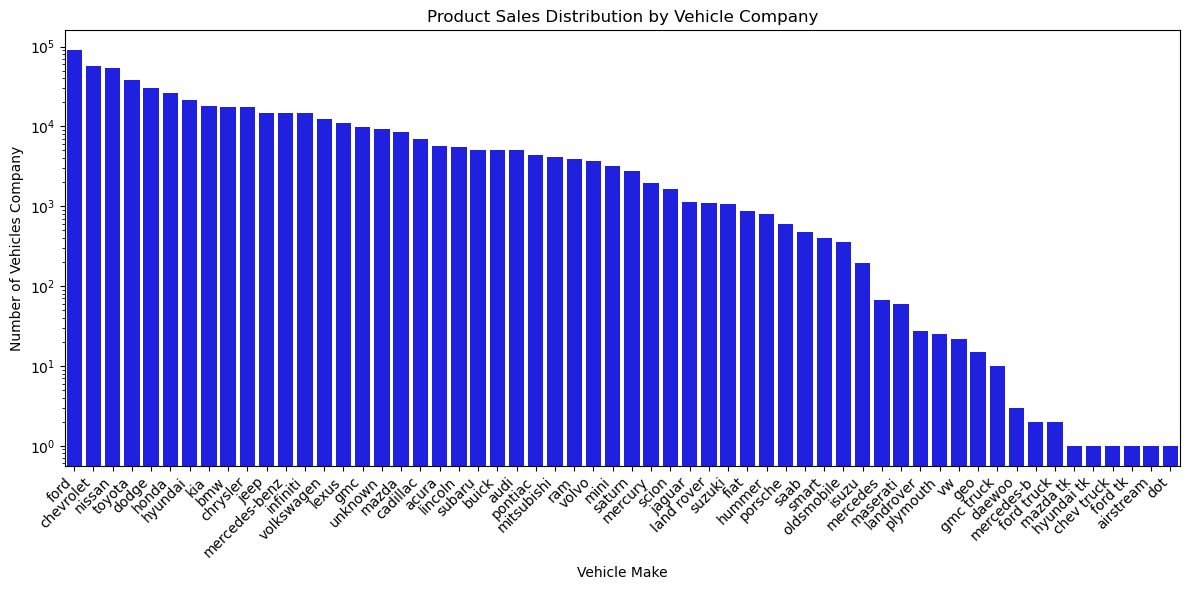

In [20]:
# Load the data
clean_df = df

# Group by 'make' and count the number of vehicles sold
product_sales = clean_df['make'].value_counts()

# Normalize the 'make' column to lowercase
clean_df['make'] = clean_df['make'].str.lower()

# Plot the product sales distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales.index, y=product_sales.values, color="blue")
plt.title('Product Sales Distribution by Vehicle Company')
plt.xlabel('Vehicle Make')
plt.ylabel('Number of Vehicles Company')

# Apply the log scale to the y-axis
plt.yscale('log')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()